In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [235]:
df = pd.read_parquet('../data/cleaned/sp500.parquet')
df

,Date,Close,High,Low,Open,Volume,LogRet
0,2005-09-20,1221.339966,-0.001148,-0.006194,-0.005581,0.110541,-0.007895
1,2005-09-21,1210.199951,-0.012181,-0.008379,-0.007895,0.094124,-0.009163
2,2005-09-22,1214.619995,-0.004003,-0.003759,-0.009163,-0.049652,0.003646
3,2005-09-23,1215.290039,0.001798,0.003685,0.003646,-0.206151,0.000551
4,2005-09-26,1215.630005,0.003056,0.001685,0.000551,0.024631,0.000280
...,...,...,...,...,...,...,...
5025,2025-09-11,6587.470215,0.005616,0.004511,0.000629,0.032486,0.008450
5026,2025-09-12,6584.290039,0.001110,0.005134,0.005515,-0.156219,-0.000483
5027,2025-09-15,6615.279785,0.002937,0.003426,0.001945,0.083334,0.004696
5028,2025-09-16,6606.759766,0.001113,-0.000297,0.003121,0.060471,-0.001289


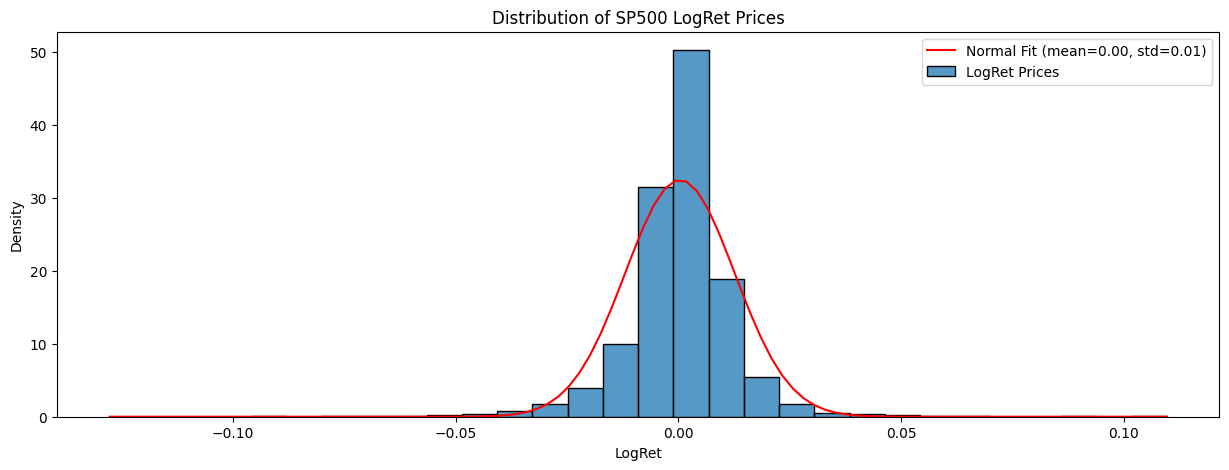

In [236]:
from scipy.stats import norm
import numpy as np

import matplotlib.pyplot as plt
df.dropna(inplace=True)
# Plot histogram of Close prices
plt.figure(figsize=(15, 5))
sns.histplot(df['LogRet'], kde=False, stat="density", bins=30, label='LogRet Prices')

# Fit a normal distribution to the data
mean, std = norm.fit(df['LogRet'])
x = np.linspace(df['LogRet'].min(), df['LogRet'].max(), 100)
pdf = norm.pdf(x, mean, std)

# Plot the normal distribution curve
plt.plot(x, pdf, 'r-', label=f'Normal Fit (mean={mean:.2f}, std={std:.2f})')
plt.title('Distribution of SP500 LogRet Prices')
plt.legend()
plt.show()

## Stationarity analysis

In [237]:

from statsmodels.tsa.stattools import adfuller, kpss
import warnings
warnings.filterwarnings('ignore')

def stationarity_analysis(df, dataset_name, column_name = None):
    """
    column_name: specify the column to analyze, default is 'Close'
    Perform ADF and KPSS tests for stationarity analysis
    """
    data = df['Close'] if column_name is None else df[column_name]
    
    data.dropna(inplace=True)  # Drop NaN values for accurate testing
    
    print(f"\n{'='*50}")
    print(f"STATIONARITY ANALYSIS: {dataset_name.upper()}")
    print(f"{'='*50}")
    
    # ADF Test
    print("\n--- AUGMENTED DICKEY-FULLER TEST ---")
    adf_result = adfuller(data, autolag='AIC')
    print(f"ADF Statistic: {adf_result[0]:.6f}")
    print(f"p-value: {adf_result[1]:.6f}")
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"\t{key}: {value:.6f}")
    
    if adf_result[1] <= 0.05:
        print("ADF Result: STATIONARY (Reject null hypothesis)")
    else:
        print("ADF Result: NON-STATIONARY (Fail to reject null hypothesis)")
    
    # KPSS Test
    print("\n--- KWIATKOWSKI-PHILLIPS-SCHMIDT-SHIN TEST ---")
    kpss_result = kpss(data, regression='c', nlags='auto')
    print(f"KPSS Statistic: {kpss_result[0]:.6f}")
    print(f"p-value: {kpss_result[1]:.6f}")
    print("Critical Values:")
    for key, value in kpss_result[3].items():
        print(f"\t{key}: {value:.6f}")
    
    if kpss_result[1] <= 0.05:
        print("KPSS Result: NON-STATIONARY (Reject null hypothesis)")
    else:
        print("KPSS Result: STATIONARY (Fail to reject null hypothesis)")
    
    # Combined interpretation
    print("\n--- COMBINED INTERPRETATION ---")
    adf_stationary = adf_result[1] <= 0.05
    kpss_stationary = kpss_result[1] > 0.05
    
    if adf_stationary and kpss_stationary:
        print("CONCLUSION: Series is STATIONARY")
    elif not adf_stationary and not kpss_stationary:
        print("CONCLUSION: Series is NON-STATIONARY")
    else:
        print("CONCLUSION: Results are INCONCLUSIVE - further investigation needed")

stationarity_analysis(df=df, dataset_name="S&P500_raw")
stationarity_analysis(df=df, dataset_name="S&P500_log_returns", column_name='LogRet')


STATIONARITY ANALYSIS: S&P500_RAW

--- AUGMENTED DICKEY-FULLER TEST ---
ADF Statistic: 2.214788
p-value: 0.998894
Critical Values:
	1%: -3.431658
	5%: -2.862118
	10%: -2.567078
ADF Result: NON-STATIONARY (Fail to reject null hypothesis)

--- KWIATKOWSKI-PHILLIPS-SCHMIDT-SHIN TEST ---
KPSS Statistic: 10.284780
p-value: 0.010000
Critical Values:
	10%: 0.347000
	5%: 0.463000
	2.5%: 0.574000
	1%: 0.739000
KPSS Result: NON-STATIONARY (Reject null hypothesis)

--- COMBINED INTERPRETATION ---
CONCLUSION: Series is NON-STATIONARY

STATIONARITY ANALYSIS: S&P500_LOG_RETURNS

--- AUGMENTED DICKEY-FULLER TEST ---
ADF Statistic: -17.945452
p-value: 0.000000
Critical Values:
	1%: -3.431655
	5%: -2.862117
	10%: -2.567077
ADF Result: STATIONARY (Reject null hypothesis)

--- KWIATKOWSKI-PHILLIPS-SCHMIDT-SHIN TEST ---
KPSS Statistic: 0.189312
p-value: 0.100000
Critical Values:
	10%: 0.347000
	5%: 0.463000
	2.5%: 0.574000
	1%: 0.739000
KPSS Result: STATIONARY (Fail to reject null hypothesis)

--- COMBIN

In [238]:
mean_lr = df['LogRet'].mean()
std_lr = df['LogRet'].std()
CLAMP_STD = 3

upper = mean_lr + CLAMP_STD * std_lr
lower = mean_lr - CLAMP_STD * std_lr

df['LogRet'] = np.where(df['LogRet'] > upper, upper,
                        np.where(df['LogRet'] < lower, lower, df['LogRet']))


In [239]:

df['LogRet'].mean()- df['LogRet'].std()

np.float64(-0.010425227034457555)

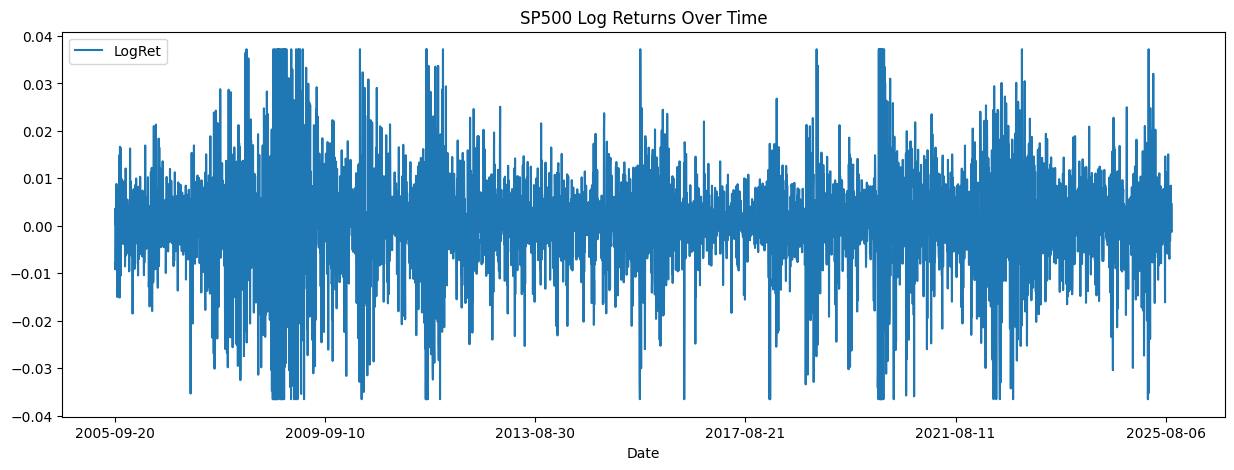

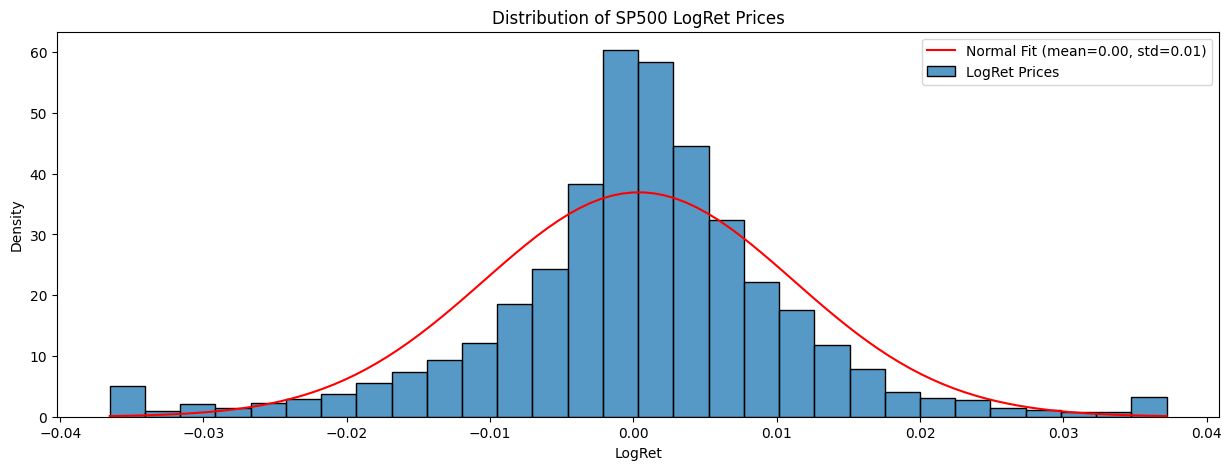

In [240]:
df.plot(x= 'Date', y='LogRet', title='SP500 Log Returns Over Time', figsize=(15,5))

# Plot histogram of Close prices
plt.figure(figsize=(15, 5))
sns.histplot(df['LogRet'], kde=False, stat="density", bins=30, label='LogRet Prices')

# Fit a normal distribution to the data
mean, std = norm.fit(df['LogRet'])
x = np.linspace(df['LogRet'].min(), df['LogRet'].max(), 100)
pdf = norm.pdf(x, mean, std)

# Plot the normal distribution curve
plt.plot(x, pdf, 'r-', label=f'Normal Fit (mean={mean:.2f}, std={std:.2f})')
plt.title('Distribution of SP500 LogRet Prices')
plt.legend()
plt.show()

In [241]:
# create a collumn calles highlow_range which is the difference between the high and low prices
df['highlow_range'] = df['High'] - df['Low']


In [242]:
cordf = df.drop(columns=['Date']).corr()
# cordf = df.drop(columns=['Date']).corr()
cordf

,Close,High,Low,Open,Volume,LogRet,highlow_range
Close,1.000000,0.028024,0.023717,0.022363,0.000407,0.020695,-0.000388
High,0.028024,1.000000,0.725266,0.642281,0.033789,0.609111,0.159710
Low,0.023717,0.725266,1.000000,0.622025,-0.183648,0.633965,-0.563799
Open,0.022363,0.642281,0.622025,1.000000,-0.033610,0.064077,-0.121390
Volume,0.000407,0.033789,-0.183648,-0.033610,1.000000,-0.082461,0.303827
LogRet,0.020695,0.609111,0.633965,0.064077,-0.082461,1.000000,-0.178302
highlow_range,-0.000388,0.159710,-0.563799,-0.121390,0.303827,-0.178302,1.000000


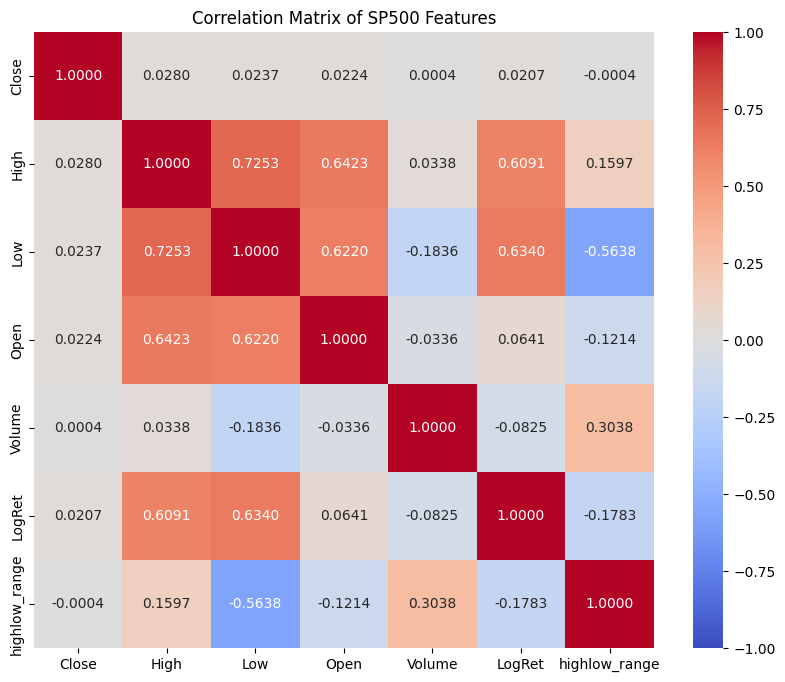

In [243]:
# correlation plot of all the features in the dataframe
plt.figure(figsize=(10, 8))
sns.heatmap(cordf, annot=True, fmt=".4f", cmap='coolwarm', cbar=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix of SP500 Features')
plt.show()

In [244]:
df

,Date,Close,High,Low,Open,Volume,LogRet,highlow_range
0,2005-09-20,1221.339966,-0.001148,-0.006194,-0.005581,0.110541,-0.007895,0.005046
1,2005-09-21,1210.199951,-0.012181,-0.008379,-0.007895,0.094124,-0.009163,-0.003802
2,2005-09-22,1214.619995,-0.004003,-0.003759,-0.009163,-0.049652,0.003646,-0.000244
3,2005-09-23,1215.290039,0.001798,0.003685,0.003646,-0.206151,0.000551,-0.001887
4,2005-09-26,1215.630005,0.003056,0.001685,0.000551,0.024631,0.000280,0.001371
...,...,...,...,...,...,...,...,...
5025,2025-09-11,6587.470215,0.005616,0.004511,0.000629,0.032486,0.008450,0.001105
5026,2025-09-12,6584.290039,0.001110,0.005134,0.005515,-0.156219,-0.000483,-0.004024
5027,2025-09-15,6615.279785,0.002937,0.003426,0.001945,0.083334,0.004696,-0.000489
5028,2025-09-16,6606.759766,0.001113,-0.000297,0.003121,0.060471,-0.001289,0.001410


In [245]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import TimeSeriesSplit  # For guidance, but implementing custom rolling for financial data

# Step 1: Define Elman RNN Model
class ElmanRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(ElmanRNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True, nonlinearity='tanh')
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

# Step 2: Custom Dataset for Sequences
class TimeSeriesDataset(Dataset):
    def __init__(self, data, targets, seq_len=10):
        self.data = data
        self.targets = targets
        self.seq_len = seq_len
    
    def __len__(self):
        return len(self.data) - self.seq_len
    
    def __getitem__(self, idx):
        x = self.data[idx:idx + self.seq_len]
        y = self.targets[idx + self.seq_len]
        return torch.FloatTensor(x), torch.FloatTensor([y])

# Step 3: Data Preparation (No global scaling; features exclude Date and LogRet)
features = ['LogRet', 'Volume', 'highlow_range']
X = df[features].values
y = df['LogRet'].shift(-1).dropna().values  # Next LogRet; len N-1
X = X[:-1]  # Align; assume df sorted by Date


In [246]:

# Parameters
seq_len = 10
batch_size = 32
hidden_size = 100 #Hyperparameter to tune
num_layers = 1
learning_rate = 0.01 #Hyperparameter to tune
epochs = 500
n_folds = 2
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
input_size = len(features)
output_size = 1

# --- New: one overarching train/holdout split at the beginning (holdout is the last chunk of the series)
holdout_ratio = 0.3  # fraction kept for final test at the end
n_total = len(X)
holdout_size = int(holdout_ratio * n_total)
if holdout_size < seq_len + 1:
    raise ValueError("Holdout set too small for the chosen seq_len; reduce holdout_ratio or seq_len.")

X_trainval = X[:-holdout_size]
y_trainval = y[:-holdout_size]
X_holdout = X[-holdout_size:]
y_holdout = y[-holdout_size:]

# --- Growing-window CV on the training+validation portion
results = {'fold': [], 'rmse': [], 'mae': []}

n_trainval = len(X_trainval)
# initial training window inside trainval (choose a sensible starting window)
initial_train_ratio = 0.5
initial_train_window = max(int(initial_train_ratio * n_trainval), seq_len + 1)
remaining = n_trainval - initial_train_window
if remaining < n_folds:  # ensure at least one sample per test fold
    raise ValueError("Not enough data in training portion to create the requested number of folds. Reduce n_folds or holdout_ratio.")

fold_test_size = max(1, remaining // n_folds)



In [247]:

# for fold in range(n_folds):
#     train_start = 0
#     train_end = initial_train_window + fold * fold_test_size  # growing window
#     test_start = train_end
#     test_end = min(test_start + fold_test_size, n_trainval)

#     if train_end - train_start < seq_len + 1 or test_end - test_start < seq_len + 1:
#         print(f"Skipping fold {fold}: Insufficient data (train {train_start}-{train_end}, test {test_start}-{test_end})")
#         continue

#     # Extract fold data (relative to trainval)
#     X_tr = X_trainval[train_start:train_end]
#     y_tr = y_trainval[train_start:train_end]
#     X_te = X_trainval[test_start:test_end]
#     y_te = y_trainval[test_start:test_end]

#     # Scale PER FOLD (fit on train only to avoid leakage)
#     scaler_X = StandardScaler().fit(X_tr)
#     X_tr_scaled = scaler_X.transform(X_tr)
#     X_te_scaled = scaler_X.transform(X_te)

#     scaler_y = StandardScaler().fit(y_tr.reshape(-1, 1))
#     y_tr_scaled = scaler_y.transform(y_tr.reshape(-1, 1)).flatten()
#     y_te_scaled = scaler_y.transform(y_te.reshape(-1, 1)).flatten()

#     # Create datasets/loaders
#     train_dataset = TimeSeriesDataset(X_tr_scaled, y_tr_scaled, seq_len)
#     test_dataset = TimeSeriesDataset(X_te_scaled, y_te_scaled, seq_len)
#     train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
#     test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

#     # Model, loss, optimizer (fresh model per fold)
#     model = ElmanRNN(input_size, hidden_size, output_size, num_layers).to(device)
#     criterion = nn.MSELoss()
#     optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#     # Training
#     model.train()
#     for epoch in range(epochs):
#         for batch_x, batch_y in train_loader:
#             batch_x, batch_y = batch_x.to(device), batch_y.to(device)
#             optimizer.zero_grad()
#             outputs = model(batch_x)
#             loss = criterion(outputs.squeeze(), batch_y)
#             loss.backward()
#             optimizer.step()

#     # Evaluation on this fold's test block
#     model.eval()
#     predictions = []
#     with torch.no_grad():
#         for batch_x, _ in test_loader:
#             batch_x = batch_x.to(device)
#             outputs = model(batch_x)
#             predictions.extend(outputs.squeeze().cpu().numpy())

#     predictions = np.array(predictions)
#     true_y = y_te_scaled[seq_len:]  # align with sequence outputs
#     predictions = predictions[:len(true_y)]

#     rmse = np.sqrt(mean_squared_error(true_y, predictions))
#     mae = mean_absolute_error(true_y, predictions)

#     results['fold'].append(fold)
#     results['rmse'].append(rmse)
#     results['mae'].append(mae)

#     print(f"Fold {fold}: RMSE = {rmse:.4f}, MAE = {mae:.4f} (Train: {train_start}-{train_end}, Test: {test_start}-{test_end})")

# # Summarize CV results
# results_df = pd.DataFrame(results)
# print("\nGrowing-window CV Summary (on train+val):")
# print(results_df)
# if not results_df.empty:
#     print(f"Mean RMSE: {results_df['rmse'].mean():.4f} (+/- {results_df['rmse'].std() * 2:.4f})")
#     print(f"Mean MAE: {results_df['mae'].mean():.4f} (+/- {results_df['mae'].std() * 2:.4f})")



In [248]:
from sklearn.impute import SimpleImputer

Xh = X_holdout  # numpy array from your code
print("shape:", Xh.shape)
print("any inf:", np.isinf(Xh).any())
print("any nan:", np.isnan(Xh).any())
finite_mask = np.isfinite(Xh)
print("finite all?:", finite_mask.all())
# extremes
finite_vals = Xh[finite_mask]
print("max abs finite value:", np.nan if finite_vals.size==0 else np.max(np.abs(finite_vals)))
# if you still use df/feature names:
Xh_df = pd.DataFrame(Xh, columns=features)
print(Xh_df.replace([np.inf, -np.inf], np.nan).isna().sum())

# convert inf -> nan
X_trainval = np.where(np.isfinite(X_trainval), X_trainval, np.nan)
X_holdout  = np.where(np.isfinite(X_holdout),  X_holdout,  np.nan)

# impute (median is robust)
imp = SimpleImputer(strategy="median")
X_trainval = imp.fit_transform(X_trainval)
X_holdout  = imp.transform(X_holdout)

shape: (1508, 3)
any inf: True
any nan: False
finite all?: False
max abs finite value: 0.8602027484710865
LogRet           0
Volume           2
highlow_range    0
dtype: int64


In [249]:


# --- Final: retrain on entire trainval and evaluate once on the held-out end-of-series test set
# Fit scalers on whole trainval
scaler_X_full = StandardScaler().fit(X_trainval)
X_trainval_scaled = scaler_X_full.transform(X_trainval)
X_holdout_scaled = scaler_X_full.transform(X_holdout)

scaler_y_full = StandardScaler().fit(y_trainval.reshape(-1, 1))
y_trainval_scaled = scaler_y_full.transform(y_trainval.reshape(-1, 1)).flatten()
y_holdout_scaled = scaler_y_full.transform(y_holdout.reshape(-1, 1)).flatten()

train_dataset_full = TimeSeriesDataset(X_trainval_scaled, y_trainval_scaled, seq_len)
holdout_dataset = TimeSeriesDataset(X_holdout_scaled, y_holdout_scaled, seq_len)
train_loader_full = DataLoader(train_dataset_full, batch_size=batch_size, shuffle=False)
holdout_loader = DataLoader(holdout_dataset, batch_size=batch_size, shuffle=False)

# Train final model on entire trainval
final_model = ElmanRNN(input_size, hidden_size, output_size, num_layers).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(final_model.parameters(), lr=learning_rate)


In [250]:

final_model.train()
for epoch in range(epochs):
    for batch_x, batch_y in train_loader_full:
        batch_x, batch_y = batch_x.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = final_model(batch_x)
        loss = criterion(outputs.squeeze(), batch_y)
        loss.backward()
        optimizer.step()

# Evaluate on holdout
final_model.eval()
predictions = []
with torch.no_grad():
    for batch_x, _ in holdout_loader:
        batch_x = batch_x.to(device)
        outputs = final_model(batch_x)
        predictions.extend(outputs.squeeze().cpu().numpy())

predictions = np.array(predictions)
true_y = y_holdout_scaled[seq_len:]
predictions = predictions[:len(true_y)]

rmse_holdout = np.sqrt(mean_squared_error(true_y, predictions))
mae_holdout = mean_absolute_error(true_y, predictions)

print(f"\nFinal Holdout Test (on last {holdout_size} samples): RMSE = {rmse_holdout:.4f}, MAE = {mae_holdout:.4f}")

# Optional: inverse-transform to original y scale for more interpretable metrics
y_pred_inv = scaler_y_full.inverse_transform(predictions.reshape(-1, 1)).flatten()
y_true_inv = scaler_y_full.inverse_transform(true_y.reshape(-1, 1)).flatten()
rmse_holdout_orig = np.sqrt(mean_squared_error(y_true_inv, y_pred_inv))
mae_holdout_orig = mean_absolute_error(y_true_inv, y_pred_inv)
print(f"Final Holdout Test (original y scale): RMSE = {rmse_holdout_orig:.6f}, MAE = {mae_holdout_orig:.6f}")



Final Holdout Test (on last 1508 samples): RMSE = 1.0815, MAE = 0.7819
Final Holdout Test (original y scale): RMSE = 0.011482, MAE = 0.008301
